# Modeling and Simulation in Python

Leila Merzenich


In [4]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

The following sets the initial State of the HIV model. R is activated uninfected cells, L is latently infected cells, E is actively infected cells, and V is virions.

Within the system I define the various variables that effect the flows in the model.

In [5]:
init  = State(R = 200, L = 0, E = 0, V = 4 * 10 ** (-7))
system = System(tau = .2, gamma = 1.36, mu = 1.36 * 10 ** (-3), beta = .00027, 
                rho = .1, alpha = 3.6 * 10 ** (-2), omega = 2, delta = .33, pi = 100, t0 = 0, t_end = 120, dt = 0.1)
print(system)

tau        0.20000
gamma      1.36000
mu         0.00136
beta       0.00027
rho        0.10000
alpha      0.03600
omega      2.00000
delta      0.33000
pi       100.00000
t0         0.00000
t_end    120.00000
dt         0.10000
dtype: float64


The following update function defines the flows from one Stock to another. I have made the time steps smaller than one day using Eulers method because not all of the cells change at the same time during one day so this makes for a much more realistic model.

In [6]:
def update_func(state, t, system):
    R, L, E, V = state
    
    Rbirth = system.gamma * system.tau #Flow into R
    
    Rdeath = system.mu * R #Flow out of R
    
    LtoE = system.alpha * L #Flow from L to E
    
    RtoE = (1- system.rho) * system.beta * R * V #Flow from R to E
    
    RtoL = system.rho * system.beta * R * V #Flow from R to L
    
    Ldeath = system.mu * L #Flow out of L
    
    Edeath = system.delta * E #Flow out of E
    
    Vbirth = system.pi * E #Flow into V
    
    Vdeath = system.omega * V #Flow out of V
    
    """The following differential equations are the flows during each time step"""
    dRdt = Rbirth - RtoL -RtoE -Rdeath
    dLdt = RtoL - Ldeath - LtoE
    dEdt = RtoE - Edeath + LtoE
    dVdt = Vbirth - Vdeath
    """THe following is applyin the flows to the stocks in order to find the new values of L, E, V, and R"""
    L += dLdt*dt
    E += dEdt*dt
    V += dVdt*dt
    R += dRdt*dt
    
    return State(R=R, L=L, E=E, V=V)

I now define run simulation, and each step is  the current time plus dt to account for the smaller than one timesteps made in the update function.

In [7]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    
    return frame

In [8]:
results = run_simulation(system, update_func)
def plot_results(R, L, E):
    
    plot(R, '--', label='R')
    plot(L, '-', label='L')
    plot(E, ':', label='E')
    decorate(xlabel='Time (days)',
             ylabel='Number of Cells')
def plot_results2(V):
   
    plot(V, '-', label='V')
    decorate(xlabel='Time (days)',
             ylabel='Number of Virions')

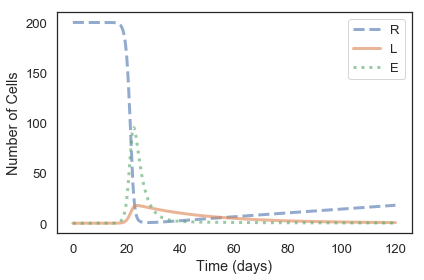

In [9]:
plot_results(results.R, results.L, results.E)

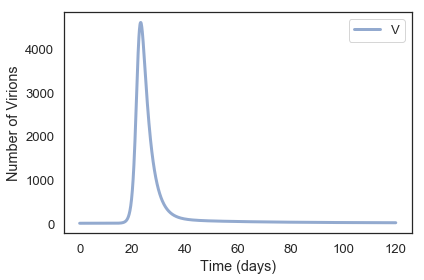

In [10]:
plot_results2(results.V)